In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Tof Sheet 3.csv")
data

,JENIS BARANG,SATUAN,TERMINAL JAMRUD UTARA DAN BARAT,"TERMINAL JAMRUD SELATAN, MIRAH DAN NILAM",AREA HMC,Rata-rata
0,Bag Cargo,Ton,"Rp9,223","Rp7,788","Rp13,500","Rp10,170"
1,General Cargo,Ton/M3,"Rp10,413","Rp8,330","Rp15,000","Rp11,248"
2,Jumbo Bag,Ton/M3,"Rp9,223","Rp7,788","Rp13,500","Rp10,170"
3,Raw Material,Ton/M3,"Rp2,864","Rp3,341","Rp4,150","Rp3,452"
4,Curah Cair,Ton,"Rp4,050","Rp3,488","Rp5,000","Rp4,179"
5,Curah Kering,Ton,"Rp2,531","Rp2,812","Rp3,500","Rp2,948"


In [6]:
print(data.dtypes)

JENIS BARANG                                object
SATUAN                                      object
TERMINAL JAMRUD UTARA DAN BARAT             object
TERMINAL JAMRUD SELATAN, MIRAH DAN NILAM    object
AREA HMC                                    object
Rata-rata                                   object
dtype: object


In [7]:
# daftar kolom yang harus dibersihkan
num_cols = ["TERMINAL JAMRUD UTARA DAN BARAT", 
            "TERMINAL JAMRUD SELATAN, MIRAH DAN NILAM", 
            "AREA HMC", 
            "Rata-rata"]

# hapus Rp dan koma, lalu ubah ke float
for col in num_cols:
    data[col] = data[col].str.replace("Rp", "", regex=False) \
                         .str.replace(",", "", regex=False) \
                         .astype(float)

# cek lagi tipe datanya
print(data.dtypes)


JENIS BARANG                                 object
SATUAN                                       object
TERMINAL JAMRUD UTARA DAN BARAT             float64
TERMINAL JAMRUD SELATAN, MIRAH DAN NILAM    float64
AREA HMC                                    float64
Rata-rata                                   float64
dtype: object


In [10]:
data

,JENIS BARANG,SATUAN,TERMINAL JAMRUD UTARA DAN BARAT,"TERMINAL JAMRUD SELATAN, MIRAH DAN NILAM",AREA HMC,Rata-rata
0,Bag Cargo,Ton,9223.0,7788.0,13500.0,10170.0
1,General Cargo,Ton/M3,10413.0,8330.0,15000.0,11248.0
2,Jumbo Bag,Ton/M3,9223.0,7788.0,13500.0,10170.0
3,Raw Material,Ton/M3,2864.0,3341.0,4150.0,3452.0
4,Curah Cair,Ton,4050.0,3488.0,5000.0,4179.0
5,Curah Kering,Ton,2531.0,2812.0,3500.0,2948.0


STATISTIK DESKRIPTIF

In [16]:
# --- 1. Statistik Deskriptif ---
print("\nStatistik Deskriptif:")
print(data[num_cols].describe())

# Barang dengan rata-rata tarif tertinggi & terendah
max_item = data.loc[data["Rata-rata"].idxmax(), ["JENIS BARANG", "Rata-rata"]]
min_item = data.loc[data["Rata-rata"].idxmin(), ["JENIS BARANG", "Rata-rata"]]
print("\nBarang dengan tarif rata-rata tertinggi:", max_item.values)
print("Barang dengan tarif rata-rata terendah :", min_item.values)


Statistik Deskriptif:
       TERMINAL JAMRUD UTARA DAN BARAT  \
count                         6.000000   
mean                       6384.000000   
std                        3606.556474   
min                        2531.000000   
25%                        3160.500000   
50%                        6636.500000   
75%                        9223.000000   
max                       10413.000000   

       TERMINAL JAMRUD SELATAN, MIRAH DAN NILAM      AREA HMC     Rata-rata  
count                                  6.000000      6.000000      6.000000  
mean                                5591.166667   9108.333333   7027.833333  
std                                 2621.590694   5407.440861   3875.660069  
min                                 2812.000000   3500.000000   2948.000000  
25%                                 3377.750000   4362.500000   3633.750000  
50%                                 5638.000000   9250.000000   7174.500000  
75%                                 7788.000000  135

VISUALISASI

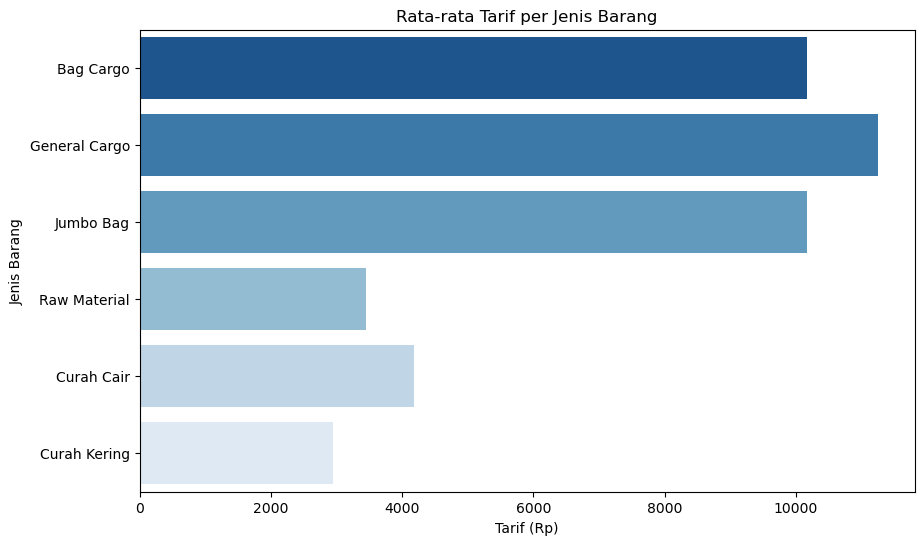

In [20]:
# a. Bar Chart Rata-rata Tarif per Barang
plt.figure(figsize=(10,6))
sns.barplot(x="Rata-rata", y="JENIS BARANG", data=data, palette="Blues_r")
plt.title("Rata-rata Tarif per Jenis Barang")
plt.xlabel("Tarif (Rp)")
plt.ylabel("Jenis Barang")
plt.show()

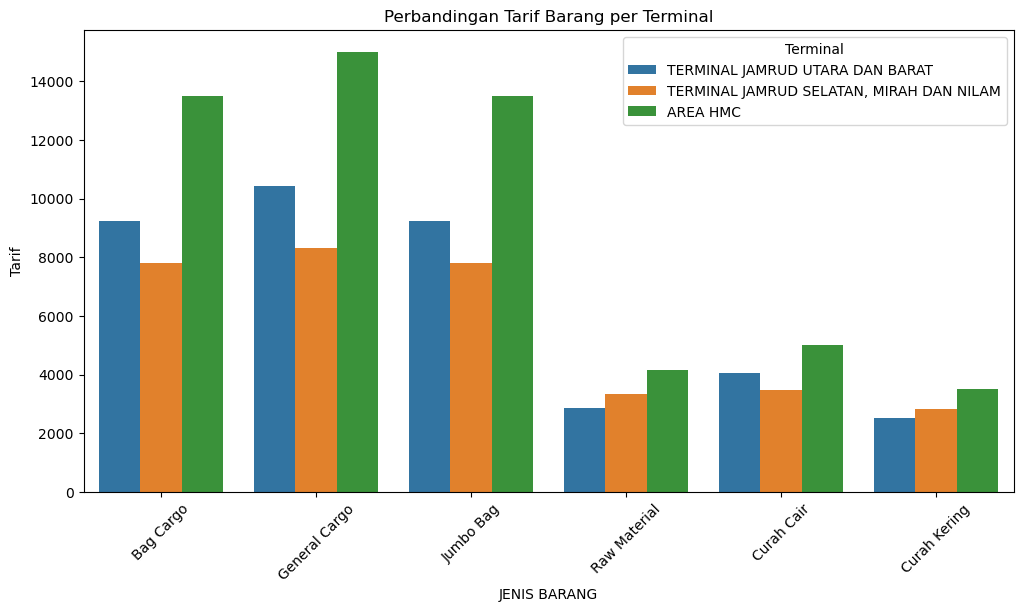

In [21]:
# b. Grouped Bar Chart (Tarif Barang per Terminal)
plt.figure(figsize=(12,6))
data_melt = data.melt(id_vars=["JENIS BARANG"], 
                      value_vars=num_cols[:-1], # tanpa Rata-rata
                      var_name="Terminal", value_name="Tarif")
sns.barplot(x="JENIS BARANG", y="Tarif", hue="Terminal", data=data_melt)
plt.title("Perbandingan Tarif Barang per Terminal")
plt.xticks(rotation=45)
plt.show()

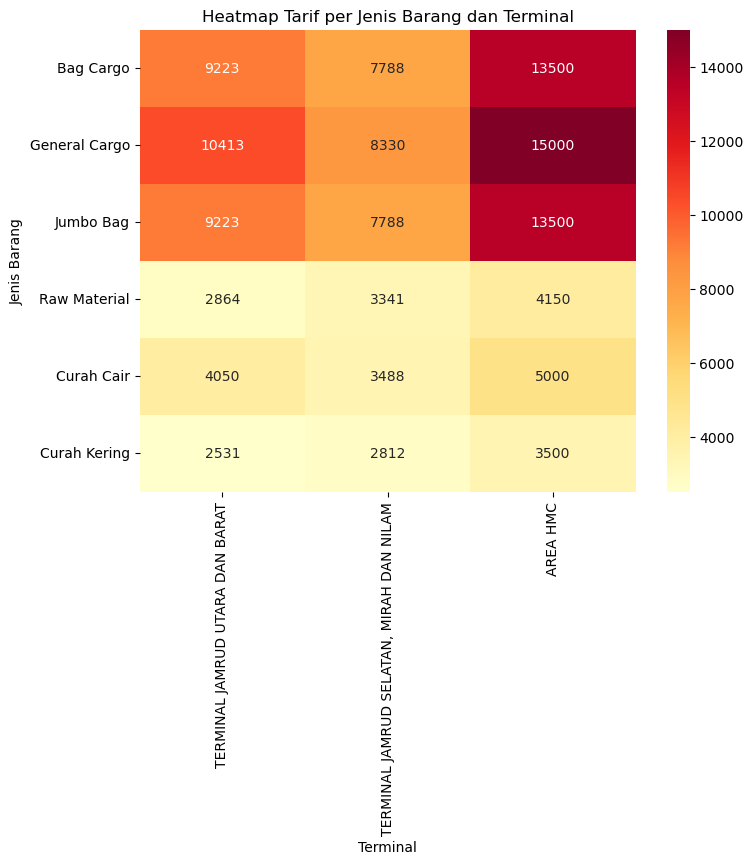

In [22]:
# c. Heatmap Tarif Barang vs Terminal
plt.figure(figsize=(8,6))
heatmap_data = data.set_index("JENIS BARANG")[num_cols[:-1]]
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Heatmap Tarif per Jenis Barang dan Terminal")
plt.xlabel("Terminal")
plt.ylabel("Jenis Barang")
plt.show()

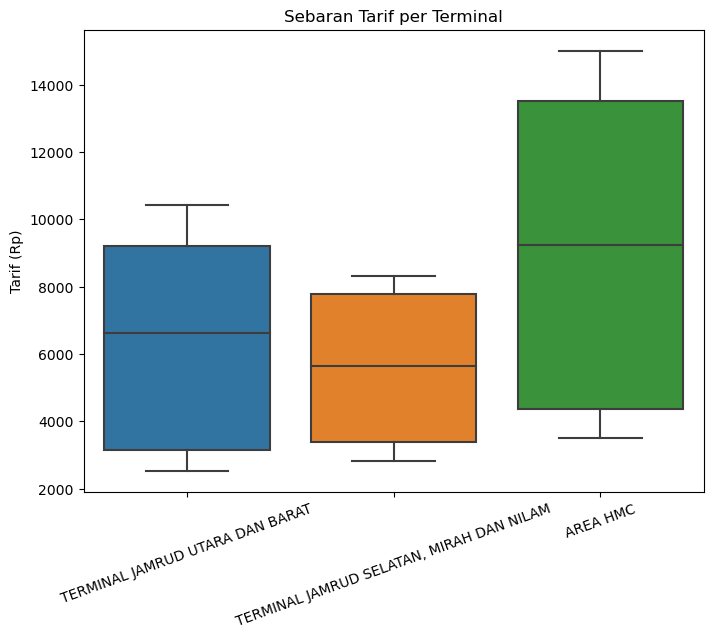

In [23]:
# Boxplot tarif per terminal
plt.figure(figsize=(8,6))
sns.boxplot(data=data[num_cols[:-1]])
plt.title("Sebaran Tarif per Terminal")
plt.ylabel("Tarif (Rp)")
plt.xticks(rotation=20)
plt.show()

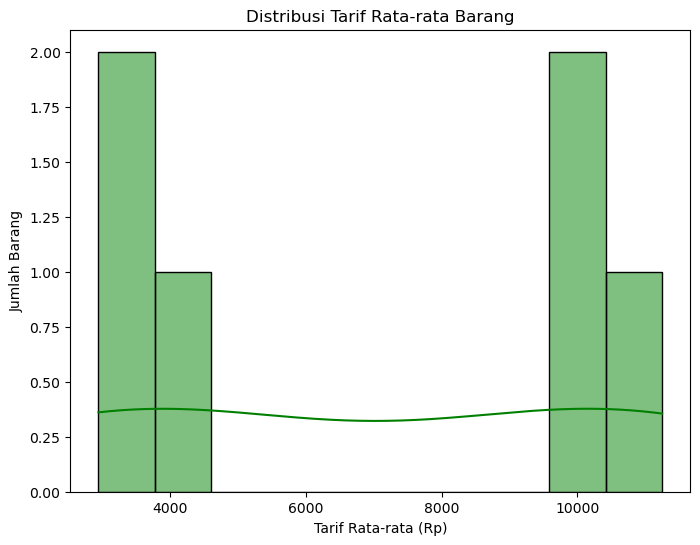

In [28]:
# Histogram tarif rata-rata
plt.figure(figsize=(8,6))
sns.histplot(data["Rata-rata"], bins=10, kde=True, color="green")
plt.title("Distribusi Tarif Rata-rata Barang")
plt.xlabel("Tarif Rata-rata (Rp)")
plt.ylabel("Jumlah Barang")
plt.show()